In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [4]:
train.drop(columns=['PassengerId'],inplace=True)
test.drop(columns=['PassengerId'],inplace=True)

In [5]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [7]:
train['Cabin'].fillna('Missing',inplace = True)
train['Cabin'] = train['Cabin'].astype(str).str[0]
train.groupby(['Cabin'])['Survived'].mean().sort_values()
labels = train.groupby(['Cabin'])['Survived'].mean().sort_values().index
label_two = {k:i for i,k in enumerate (labels ,0)}
train['Cabin_ordinal_label'] = train['Cabin'].map(label_two)
train

Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0      male  22.0      1      0         A/5 21171   7.2500     M        S   
1    female  38.0      1      0          PC 17599  71.2833     C        C   
2    female  26.0      0      0  STON/O2. 3101282   7.9250     M        S   
3    female  35.0      1      0            113803  53.1000     C        S   
4      male  35.0      0      0            373450   8.0500     M        S   
..      ...   ...    ...    ...               ...      ...   ...      ...   
886    male  27.0      0      0            211536  13.0000     M        S   
887  female  19.0      0      0            112053  30.0000     B        S   
888  female   NaN      1      2        W./C. 6607  23.4500     M        S   
889    male  26.0      0      0            111369  30.0000     C        C   
890    male  32.0      0      0            370376   7.7500     M        Q   

     Cabin_ordinal_label  
0                      1  
1                      4  
2                      1  
3                      4  
4                      1  
..                   ...  
886                    1  
887                    6  
888                    1  
889                    4  
890                    1  

[891 rows x 12 columns]

In [8]:
mean_age_train = train.groupby(['Sex'])['Age'].mean()
mean_age_test = test.groupby(['Sex'])['Age'].mean()

print(mean_age_train)
print(mean_age_test)

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64


In [9]:
train['Age'] = np.where(train['Sex']=='male',31,28)
test['Age'].fillna(30,inplace=True)

In [10]:
train['Embarked'].mode()
test['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [11]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)

In [12]:
test.groupby(['Pclass','Sex'])['Fare'].mean()

Pclass  Sex   
1       female    115.591168
        male       75.586551
2       female     26.438750
        male       20.184654
3       female     13.735129
        male       11.826350
Name: Fare, dtype: float64

In [13]:
test['Fare'].fillna(11.8263,inplace=True)

In [14]:
train.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [15]:
train.isnull().sum()

Survived               0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Embarked               0
Cabin_ordinal_label    0
dtype: int64

In [16]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
train.drop(columns=['Sex'],inplace=True)
test.drop(columns=['Sex'],inplace=True)
train.drop(columns=['Embarked'],inplace=True)
test.drop(columns=['Embarked'],inplace=True)

In [18]:
train.head()

Survived  Pclass  Age  SibSp  Parch     Fare  Cabin_ordinal_label
0         0       3   31      1      0   7.2500                    1
1         1       1   28      1      0  71.2833                    4
2         1       3   28      0      0   7.9250                    1
3         1       1   28      1      0  53.1000                    4
4         0       3   31      0      0   8.0500                    1

In [19]:
X = train.drop('Survived',axis=1)
y = train['Survived']

<AxesSubplot:>

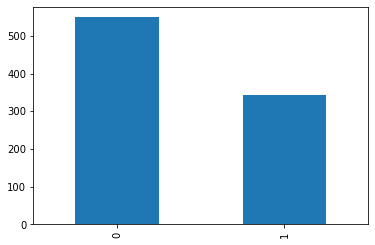

In [20]:
pd.value_counts(train['Survived']).plot.bar()

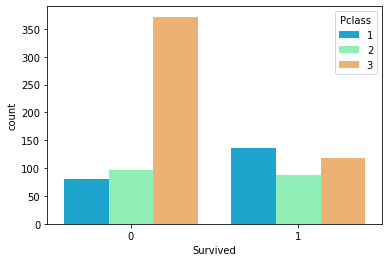

In [21]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
model = RandomForestClassifier()

In [24]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

78.77094972067039

In [26]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

